# Predicting heart disease using machine learning 

In [1]:
# This note book looks into using varios python libraries in order to create a machine learning model capable of predicting if a patient
# has or not heart disease based on some information of his medical record 

In [2]:
# We are going to take the next approach:
# 1) Problem definition
# 2) data to work with 
# 3) Evaluation 
# 4) Features 
# 5) Modeling 
# 6) Experimentation 

### 1 Problem definition 

#This project aims to develop a machine learning model using various Python libraries to predict whether a patient has or does not have heart disease, #
#based on information from their medical record.

### 2 Data
#### The data came from Cleveland UCI  machine learning repository (also Kaggle) https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset
#### Attribute Description

#1) age	Age in years	Numeric (e.g., 45, 60, etc.)

#2) sex	Sex	1 = Male, 0 = Female

#3) cp	Chest Pain Type	
1 = Typical Angina
2 = Atypical Angina
3 = Non-anginal Pain
4 = Asymptomatic

#4) trestbps	Resting Blood Pressure (in mm Hg)	Numeric (e.g., 130, 140, etc.)

#5) chol	Serum Cholesterol (in mg/dl)	Numeric

#6) fbs	Fasting Blood Sugar > 120 mg/dl	
1 = True (Yes)
0 = False (No)

#7) restecg	Resting Electrocardiographic Results	
0 = Normal
1 = ST-T Wave Abnormality
2 = Left Ventricular Hypertrophy

#8) thalach	Maximum Heart Rate Achieved	Numeric (e.g., 150, 170, etc.)

#9) exang	
Exercise Induced Angina	1 = Yes
0 = No

#10) oldpeak	ST Depression Induced by Exercise Relative to Rest	Numeric (e.g., 1.4, 2.3, etc.)

#11) slope	Slope of Peak Exercise ST Segment	
1 = Upsloping
2 = Flat
3 = Downsloping

#12) ca	Number of Major Vessels Colored by Fluoroscopy	Integer: 0 to 3

#13) thal	Thalassemia	
1 = Normal
2 = Fixed Defect
3 = Reversible Defect

#14) target	Diagnosis of Heart Disease	1 = Heart Disease
0 = No Heart Disease (Normal)

### 3 Evaluation

#### if we can reach >95 at accuracy, predicting wether or not a patient has or not heart disease during the proof of concept, we will pursue the project 

### 4 Feature

In this sectio you will get info about the feactures in your data 

In [3]:
#Preparing the tools 
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Models from scikit learn 
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# Model evaluation 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc

# Load data 

In [4]:
heart_disease = pd.read_csv("heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [5]:
heart_disease.shape #(rows and column)

(303, 14)

## Exploratory data analysis (EDA)

#### the purpose here is to learn more about the data and become a subject matter expert 

In [6]:
##### What question(s) are you trying to answer ?
##### What kind of data do you have and how you deal with the different data type ?
##### What is missing from the data and how do you deal with it ?
##### Where are the outliers and why should you care about them ?
##### How can you add, change or remove feature to get more out of your data ?

In [7]:
heart_disease.head(5) #first 5 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
#Lets find out how is the column target distributed 

heart_disease['target'].value_counts()

# 165 with heart-disease
# 138 normal 

target
1    165
0    138
Name: count, dtype: int64

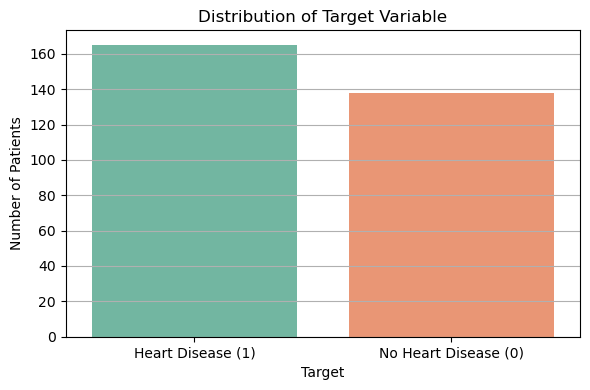

In [9]:
# Create a DataFrame for plotting
target_counts_df = heart_disease['target'].value_counts().reset_index()
target_counts_df.columns = ['Target', 'Count']
target_counts_df['Target'] = target_counts_df['Target'].replace({0: 'No Heart Disease (0)', 1: 'Heart Disease (1)'})

# Plot
plt.figure(figsize=(6, 4))
sns.barplot(data=target_counts_df, x='Target', y='Count', hue='Target', palette='Set2', legend=False)
plt.title('Distribution of Target Variable')
plt.ylabel('Number of Patients')
plt.xlabel('Target')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [10]:
heart_disease.info() ## what are the data types 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [11]:
# are there any missing values ?
heart_disease.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [12]:
# how are the columns distrubuted 
heart_disease.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


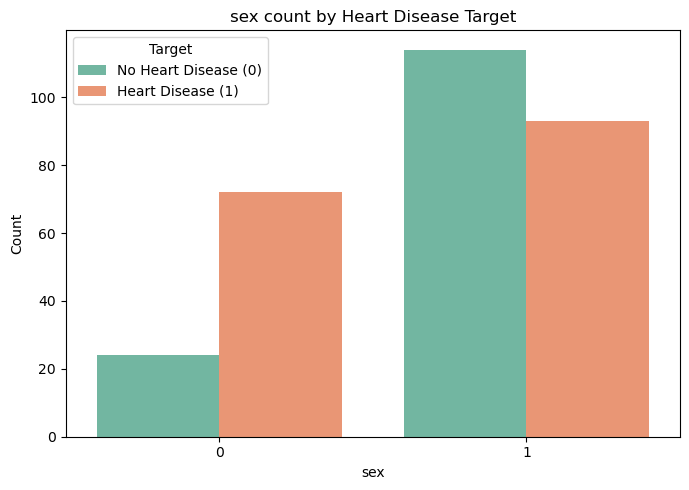

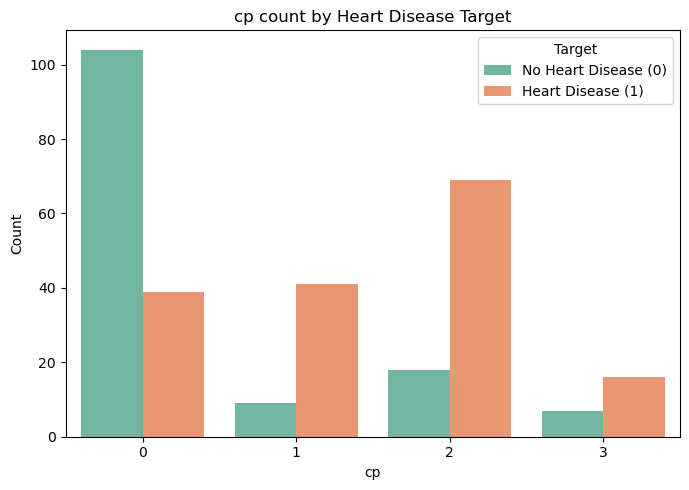

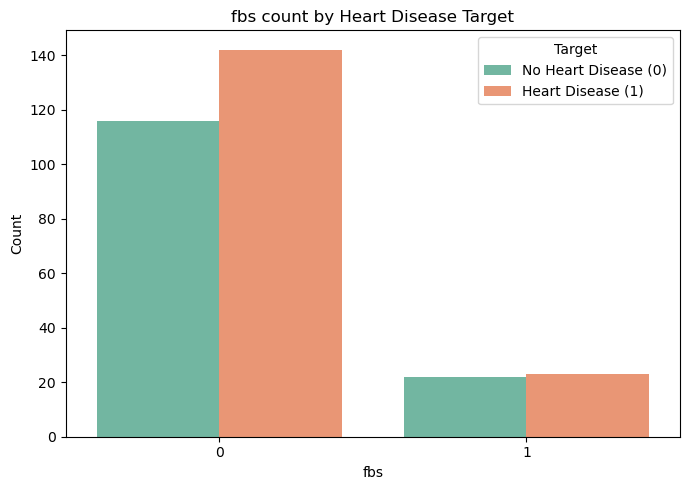

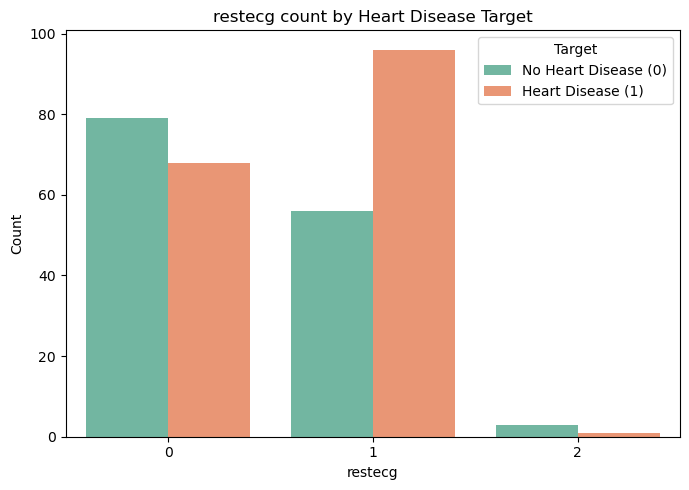

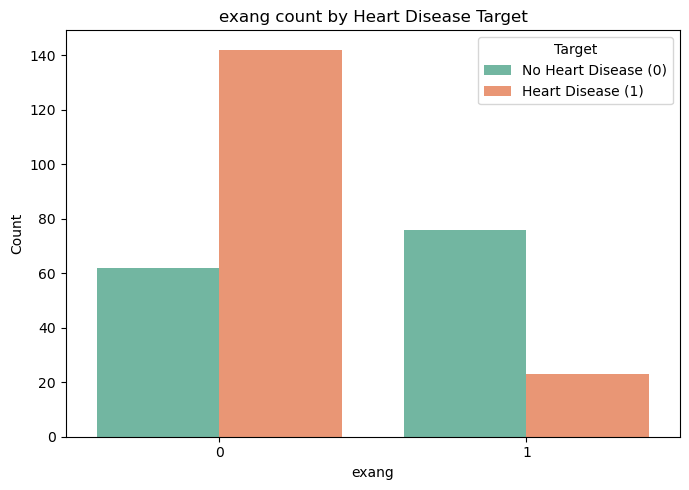

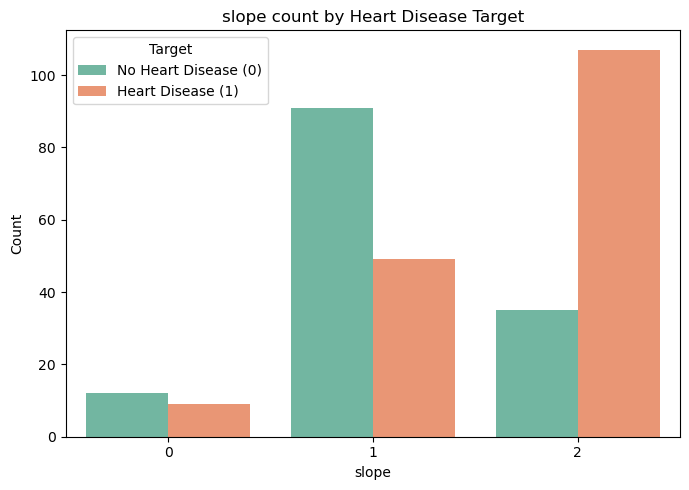

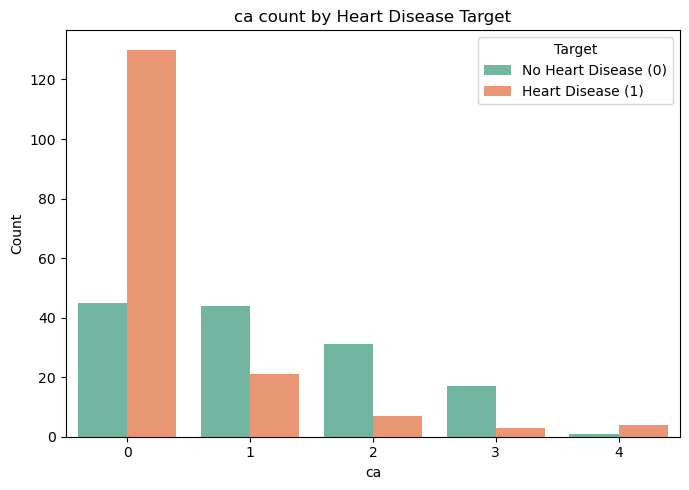

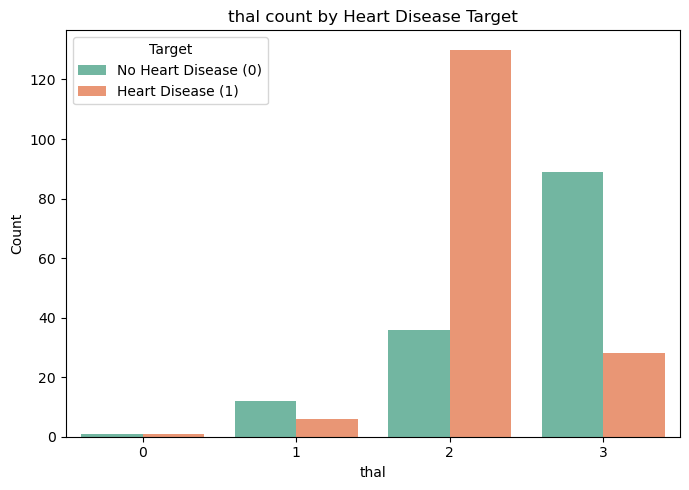

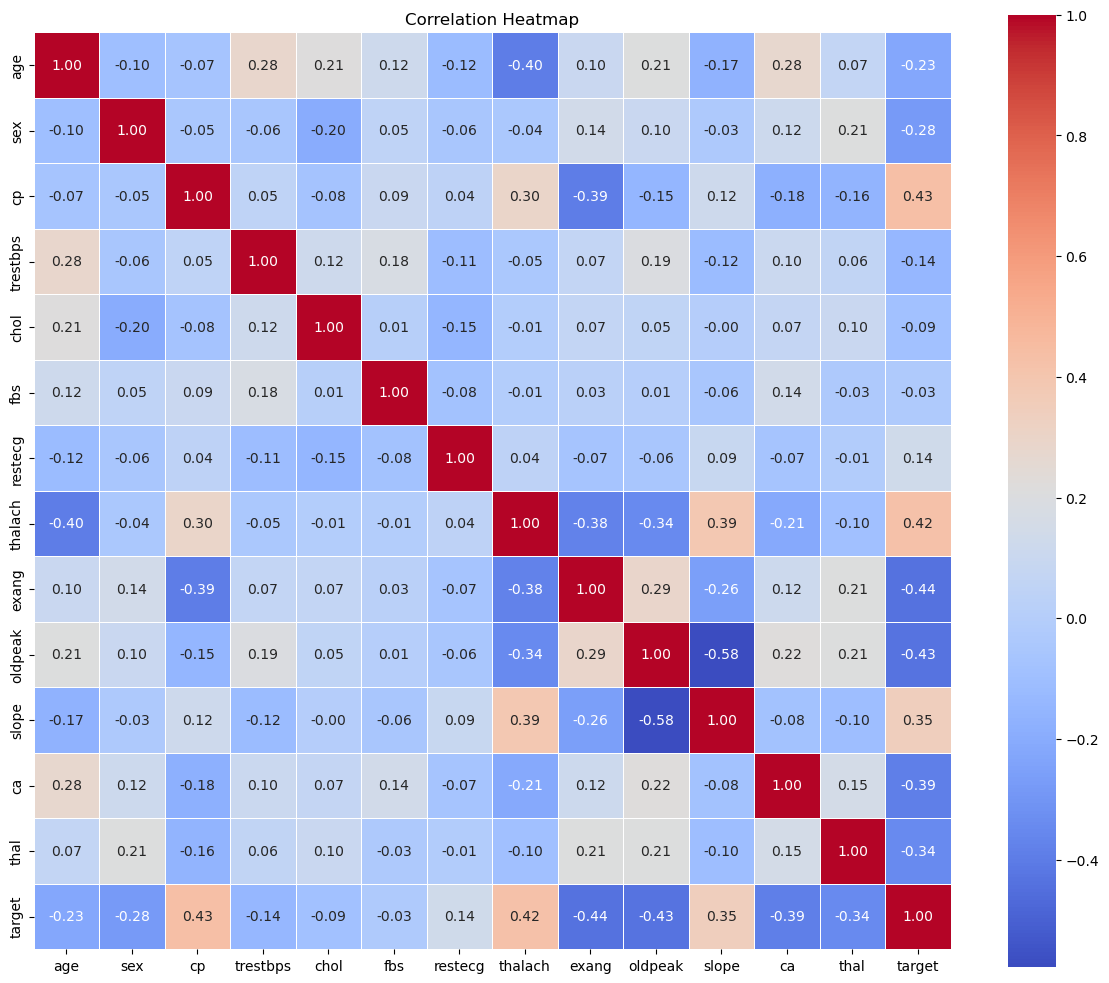

In [13]:


# Define numeric and categorical columns
numeric_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

# 1. Countplots for categorical columns vs target
for col in categorical_cols:
    plt.figure(figsize=(7, 5))
    sns.countplot(x=col, hue='target', data=heart_disease, palette='Set2')
    plt.title(f'{col} count by Heart Disease Target')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.legend(title='Target', labels=['No Heart Disease (0)', 'Heart Disease (1)'])
    plt.tight_layout()
    plt.show()

# 2. Correlation heatmap for numeric variables + target with clearer figure
plt.figure(figsize=(12, 10))
corr = heart_disease.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, square=True)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()



In [14]:
print("Sex vs Target")
print(pd.crosstab(heart_disease['sex'], heart_disease['target']), '\n')

print("Chest Pain Type vs Target")
print(pd.crosstab(heart_disease['cp'], heart_disease['target']), '\n')

print("Fasting Blood Sugar vs Target")
print(pd.crosstab(heart_disease['fbs'], heart_disease['target']), '\n')

print("Resting ECG vs Target")
print(pd.crosstab(heart_disease['restecg'], heart_disease['target']), '\n')

print("Exercise Induced Angina vs Target")
print(pd.crosstab(heart_disease['exang'], heart_disease['target']), '\n')

print("Slope vs Target")
print(pd.crosstab(heart_disease['slope'], heart_disease['target']), '\n')

print("CA vs Target")
print(pd.crosstab(heart_disease['ca'], heart_disease['target']), '\n')

print("Thal vs Target")
print(pd.crosstab(heart_disease['thal'], heart_disease['target']), '\n')


Sex vs Target
target    0   1
sex            
0        24  72
1       114  93 

Chest Pain Type vs Target
target    0   1
cp             
0       104  39
1         9  41
2        18  69
3         7  16 

Fasting Blood Sugar vs Target
target    0    1
fbs             
0       116  142
1        22   23 

Resting ECG vs Target
target    0   1
restecg        
0        79  68
1        56  96
2         3   1 

Exercise Induced Angina vs Target
target   0    1
exang          
0       62  142
1       76   23 

Slope vs Target
target   0    1
slope          
0       12    9
1       91   49
2       35  107 

CA vs Target
target   0    1
ca             
0       45  130
1       44   21
2       31    7
3       17    3
4        1    4 

Thal vs Target
target   0    1
thal           
0        1    1
1       12    6
2       36  130
3       89   28 



In [15]:
# X = feacture or independable variable 
# y = the target or dependable variable

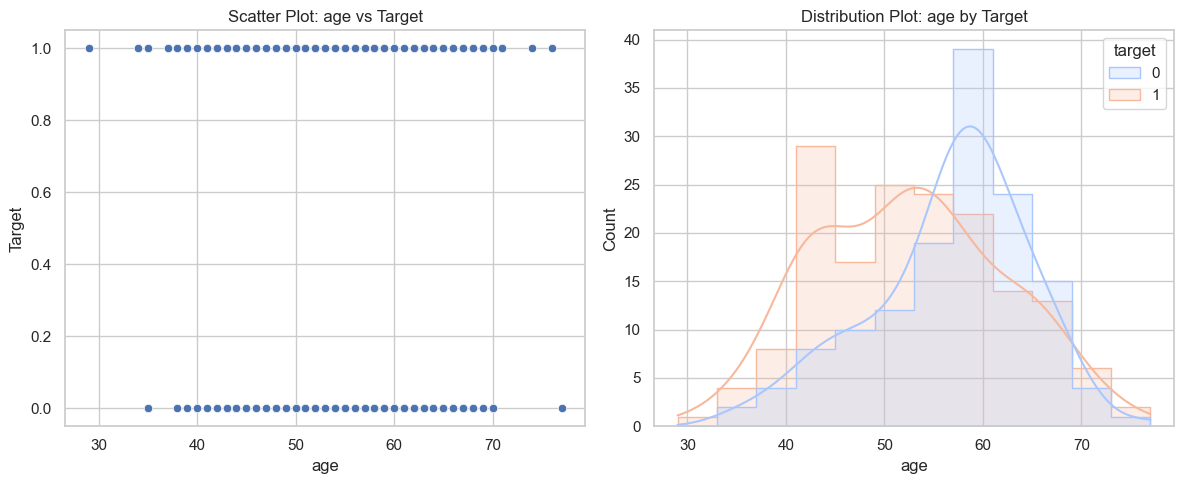

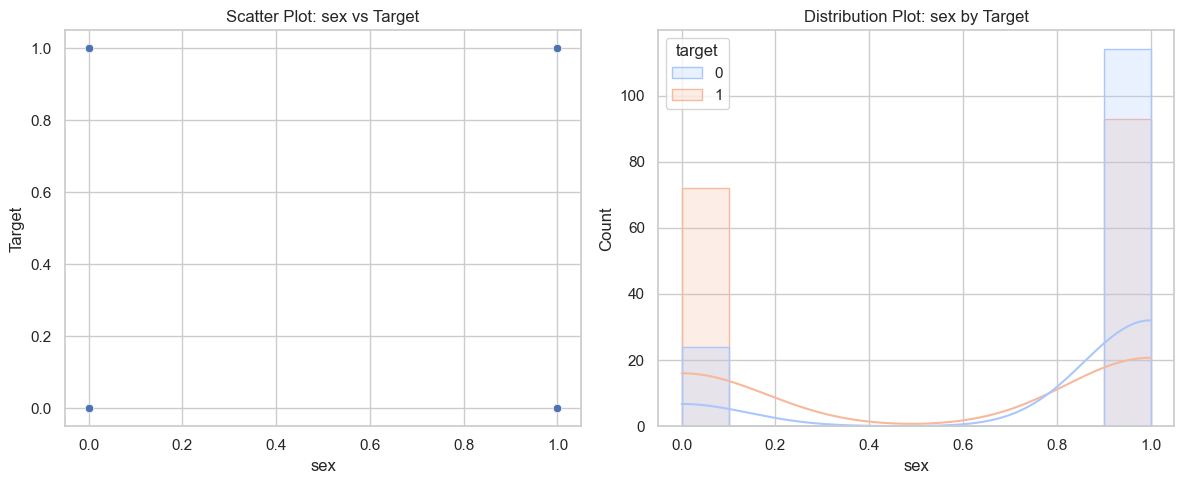

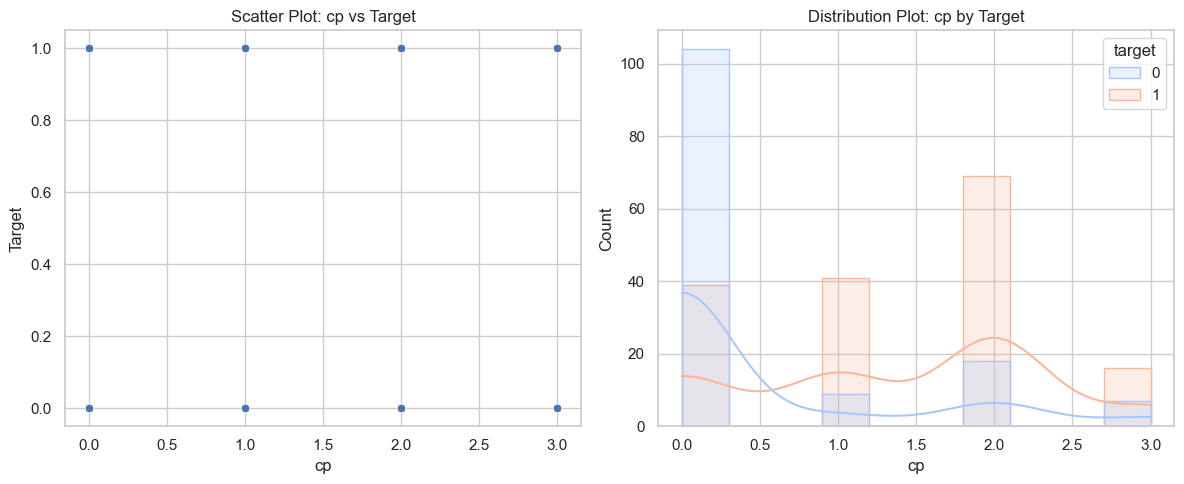

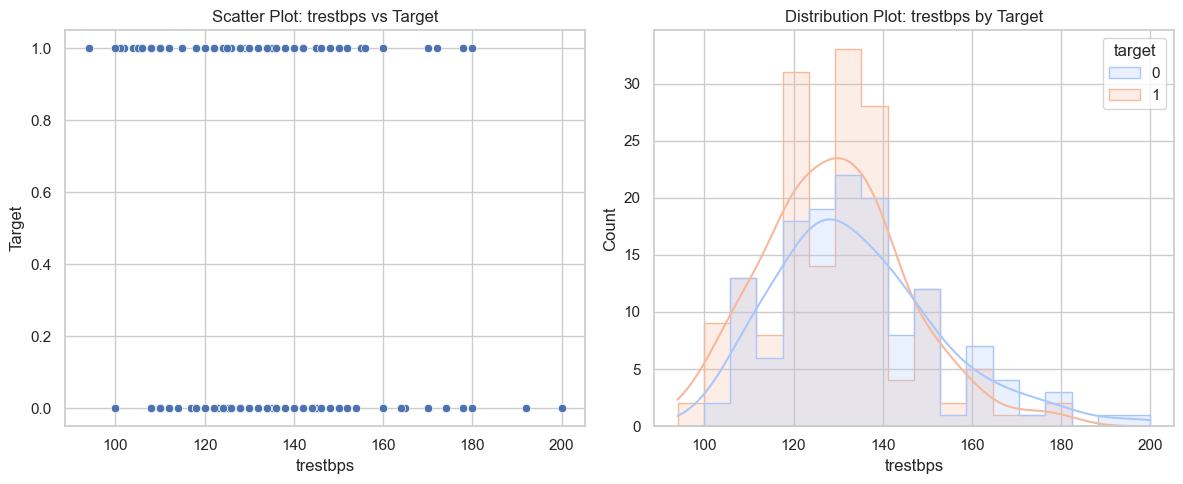

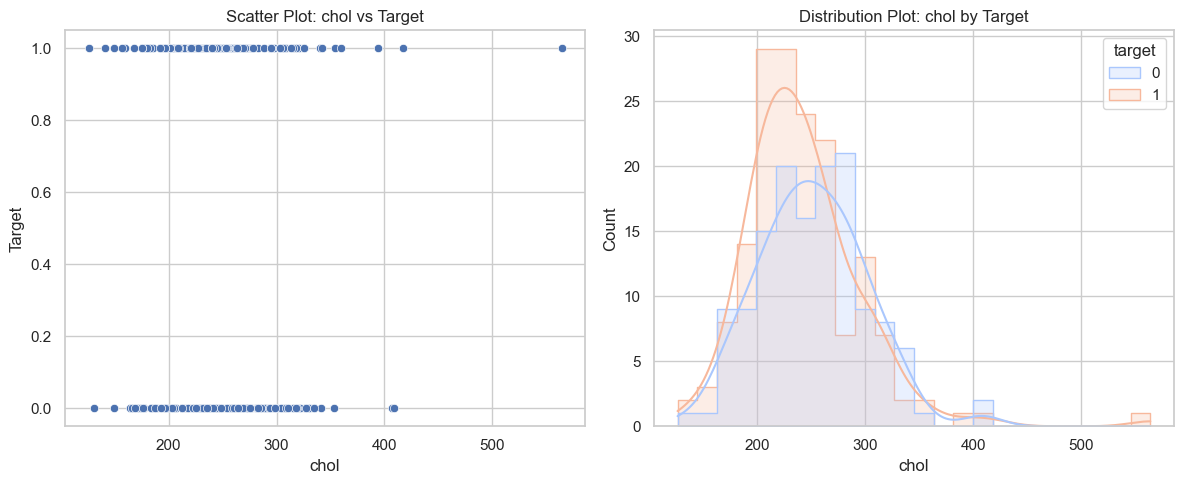

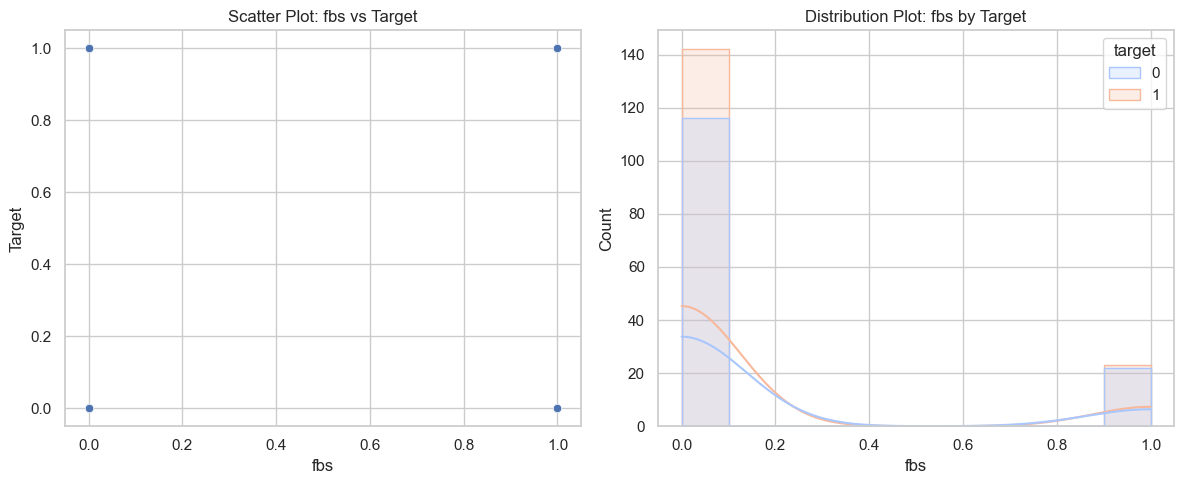

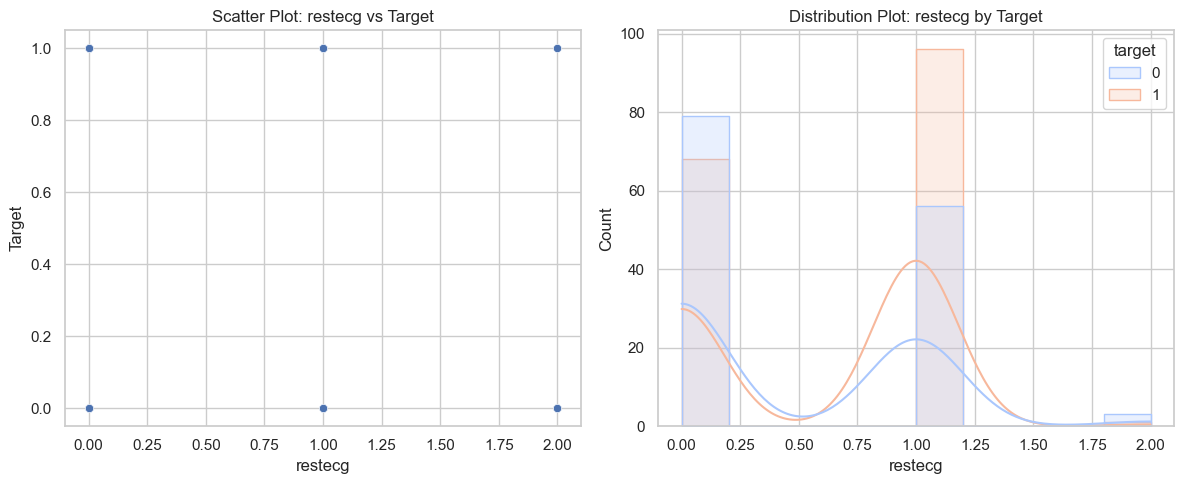

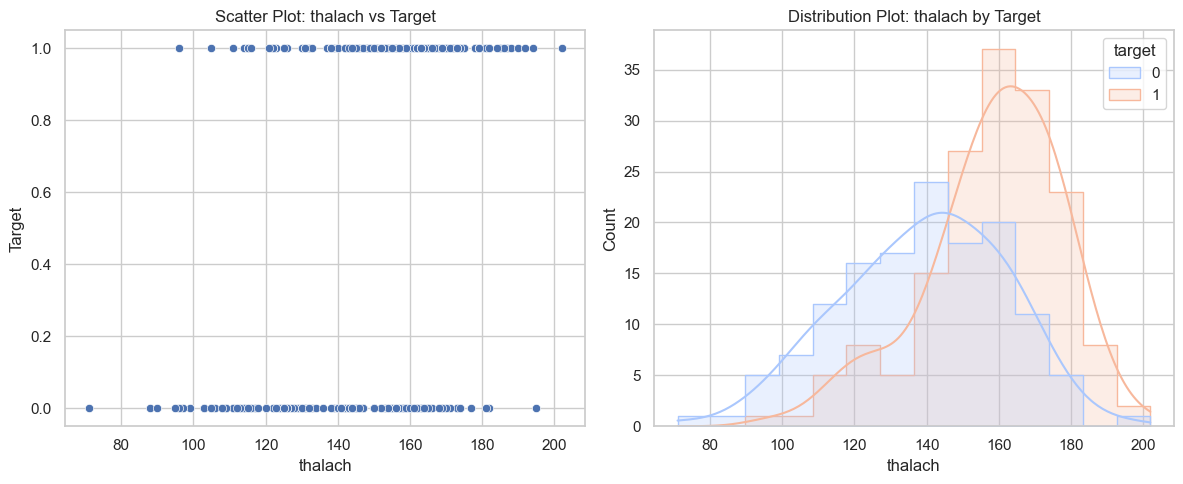

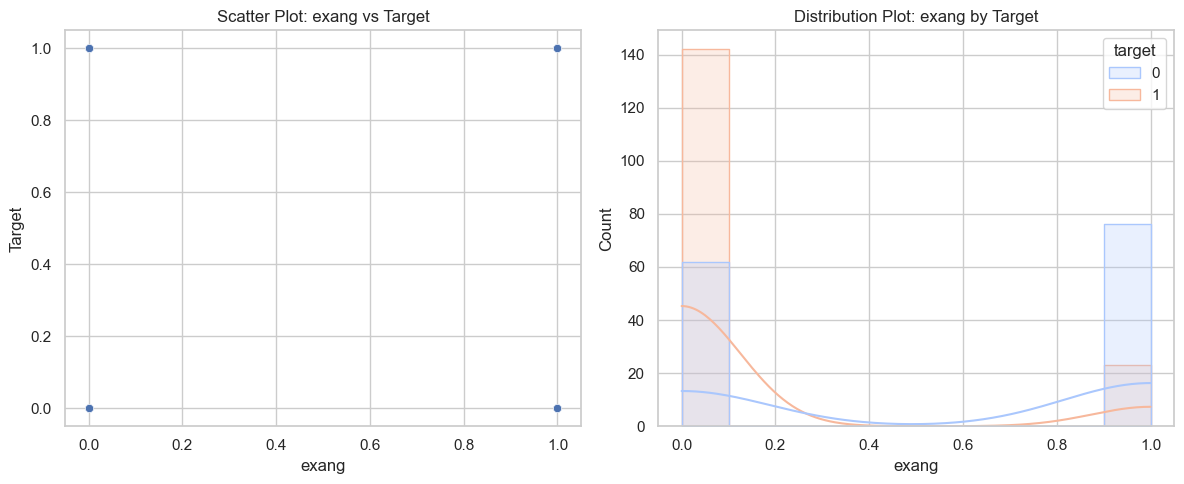

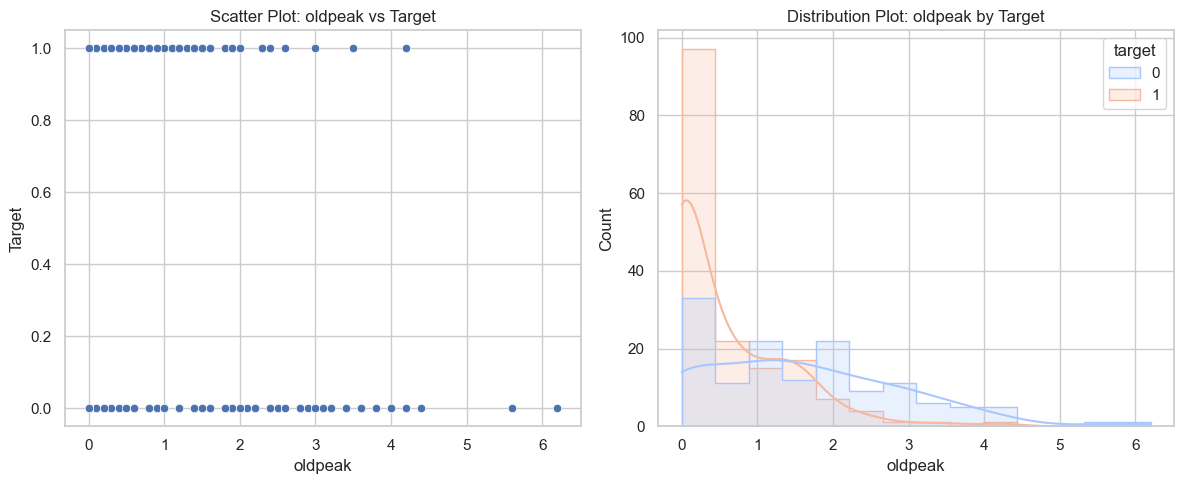

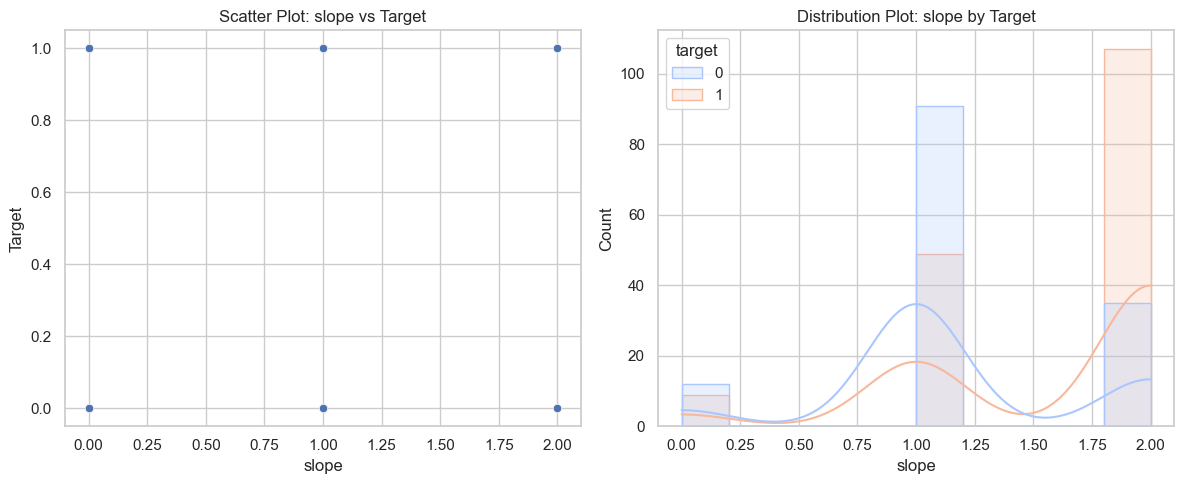

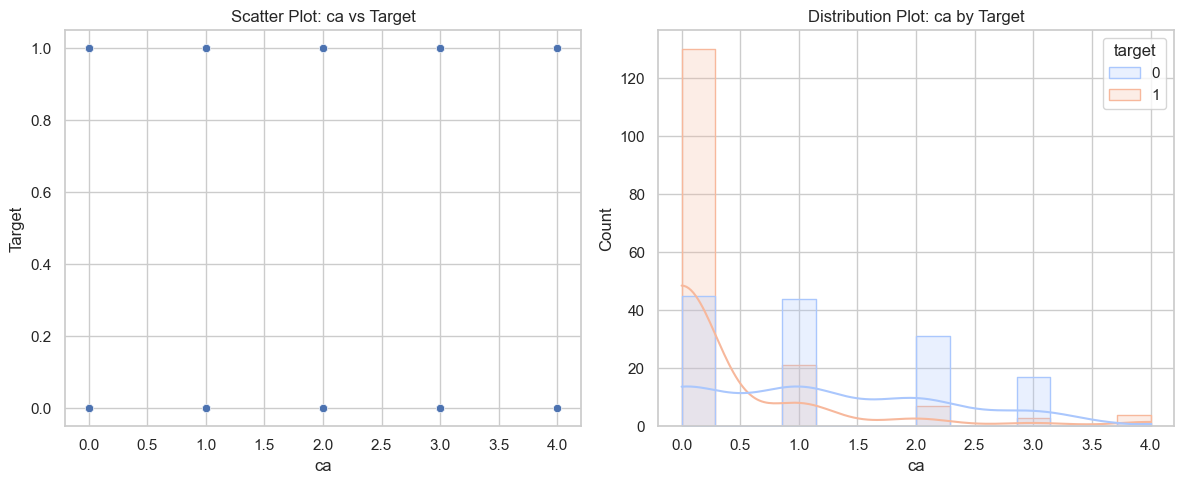

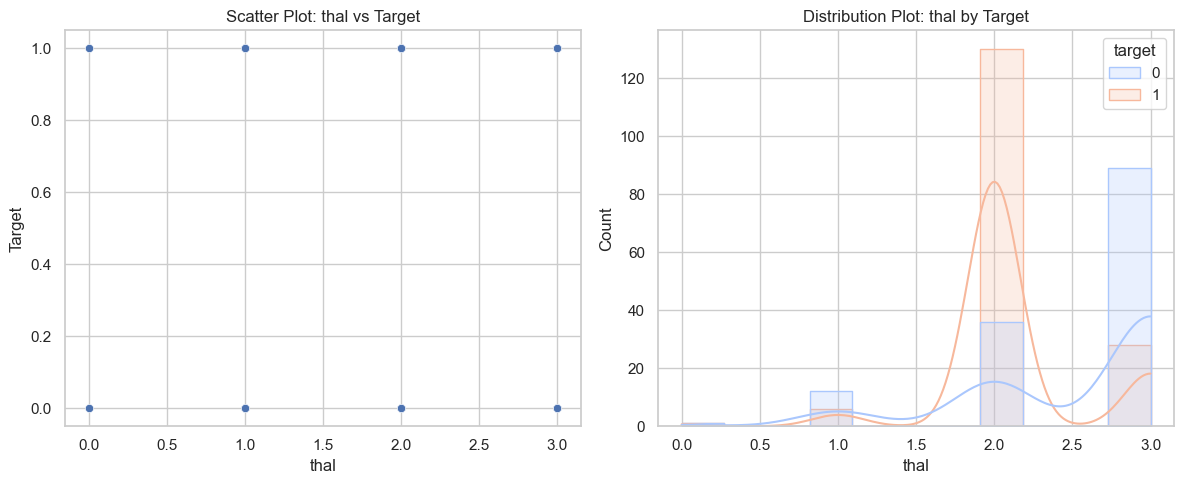

In [16]:
# Scatter plot and distribution 
# Set Seaborn style
sns.set(style="whitegrid")

# List of features excluding the target
features = [col for col in heart_disease.columns if col != 'target']

# Loop through each feature to create individual plots
for feature in features:
    plt.figure(figsize=(12, 5))

    # Scatter plot: Feature vs Target
    plt.subplot(1, 2, 1)
    sns.scatterplot(data=heart_disease, x=feature, y='target')
    plt.title(f'Scatter Plot: {feature} vs Target')
    plt.xlabel(feature)
    plt.ylabel('Target')

    # Distribution plot: Feature by Target class
    plt.subplot(1, 2, 2)
    sns.histplot(data=heart_disease, x=feature, hue='target', kde=True, element='step', palette='coolwarm')
    plt.title(f'Distribution Plot: {feature} by Target')

    plt.tight_layout()
    plt.show()


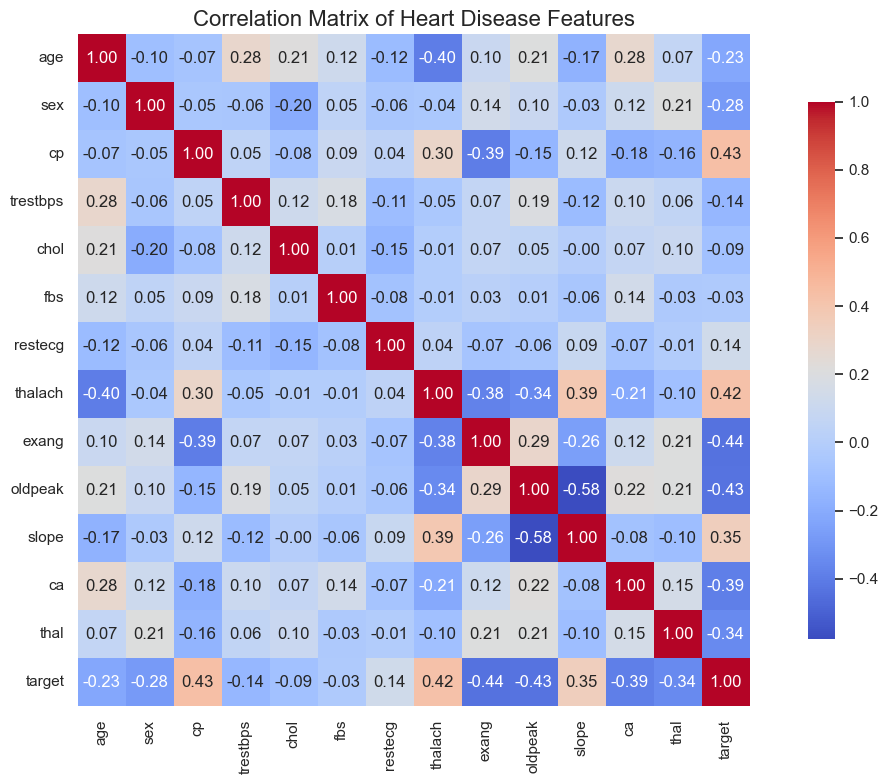

In [17]:
#Correlation matrix 

# Compute correlation matrix
corr_matrix = heart_disease.corr(numeric_only=True)

# Set plot size and style
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

# Generate a heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

plt.title("Correlation Matrix of Heart Disease Features", fontsize=16)
plt.tight_layout()
plt.show()


## 5 Modeling 

In [18]:
#### First let look at the data 
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [19]:
#### Let split the data into X anf y
X = heart_disease.drop(columns=["target"])
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [20]:
y = heart_disease["target"]
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [21]:
### Spli the data into test set 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
## Now we have our data split into trainig and test set is time to build a machine learning model 
## We will train it (find the patterns ) on the trainig set 
## and we will test it (use the patterns) 

# we are going to try three differents models 
# 1) Logistic regression 
# 2) K-Nearest Neighbours
# 3) Random Forest 

In [23]:
## put the models in a dictionary 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Create a dictionary of models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "K-Nearest Neighbours": KNeighborsClassifier(),
    "Random Forest Classifier": RandomForestClassifier()
}

In [24]:
from sklearn.metrics import accuracy_score

def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and scores multiple models.
    
    Parameters:
    - models: dict of model instances (e.g., Logistic Regression, KNN, Random Forest)
    - X_train: training features
    - X_test: testing features
    - y_train: training labels
    - y_test: testing labels

    Returns:
    - A dictionary with model names as keys and their accuracy scores as values
    """
    
    # Create an empty dictionary to store the accuracy scores of each model
    scores = {}

    # Loop through each model in the dictionary
    for name, model in models.items():
        # Train the model on the training data
        model.fit(X_train, y_train)

        # Use the trained model to make predictions on the test data
        predictions = model.predict(X_test)

        # Calculate the accuracy score by comparing predicted and actual labels
        accuracy = accuracy_score(y_test, predictions)

        # Store the accuracy score in the scores dictionary with the model name as the key
        scores[name] = accuracy

    # Return the dictionary containing model names and their corresponding accuracy scores
    return scores



In [25]:
model_score = fit_and_score(models=models, 
                           X_train=X_train, 
                           X_test=X_test, 
                           y_train=y_train, 
                           y_test=y_test)

model_score

C:\Users\18292\Desktop\heart-disease-project\env\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'K-Nearest Neighbours': 0.6885245901639344,
 'Random Forest Classifier': 0.8688524590163934}

## Compare

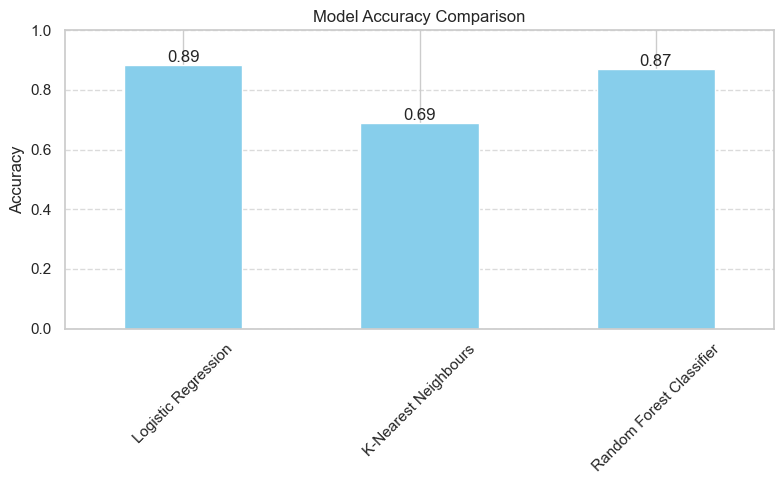

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Create and plot model comparison
pd.DataFrame(model_score, index=["accuracy"]).T.plot(
    kind="bar", legend=False, figsize=(8, 5), color="skyblue", title="Model Accuracy Comparison"
)
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add accuracy labels
for i, v in enumerate(pd.DataFrame(model_score, index=["accuracy"]).T["accuracy"]):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center')

plt.tight_layout()
plt.show()


In [27]:
# Now we have a baseline model and we know are model first prediction is not what we should base our model, What is next ?
# Let look at the following:
#1) HYPERPARAMTER TUNNING
#2) Feacture importance
#3) CONFUSION MATRIX
#4) cross valiation 
#5) presicion 
#6) recall
#7) F1 score
#8) Classification report 
#9) ROC curve 
#10) area under the curve AUC

##### Hyperparameter tunning K-Nearest Neighbours

In [28]:
from sklearn.preprocessing import StandardScaler

# Step A: Initialize the scaler
scaler = StandardScaler()

# Step B: Fit the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Step C: Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

##This helps models like K-Nearest Neighbors perform better because it prevents large numbers (like income) from dominating small ones (like age).
## Imagine you're comparing people's height and weight.
##But height is in centimeters and weight is in kilograms — it's unfair!

##Scaling turns both into the same unit — like converting everything into a standard score (e.g. "how far from average").

In [29]:
# Import necessary libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Step 1: Define the base KNN model (no hyperparameters set yet)
knn = KNeighborsClassifier()

# Step 2: Define a grid of hyperparameters to search through
param_grid = {
    'n_neighbors': range(1, 31),        # Try k values from 1 to 30
    'weights': ['uniform', 'distance'], # Use either equal weight or distance-based weighting
    'p': [1, 2]                          # Distance metric: 1=Manhattan, 2=Euclidean
}

# Step 3: Set up GridSearchCV
# This will train the model for all combinations of the parameters above using 5-fold cross-validation
grid_search = GridSearchCV(
    estimator=knn,         # Model to train
    param_grid=param_grid, # Dictionary of hyperparameters
    cv=5,                  # 5-fold cross-validation
    scoring='accuracy',    # Evaluate models using accuracy
    verbose=1              # Show progress while running
)

# Step 4: Fit the GridSearchCV to your training data
# IMPORTANT: Scaling your features (X_train_scaled) is essential for distance-based models like KNN
grid_search.fit(X_train_scaled, y_train)

# Step 5: Output the best combination of hyperparameters found during the search
print("Best Parameters:", grid_search.best_params_)

# Step 6: Print the best cross-validated accuracy score
print("Best Cross-Validated Accuracy:", grid_search.best_score_)


Fitting 5 folds for each of 120 candidates, totalling 600 fits
Best Parameters: {'n_neighbors': 20, 'p': 1, 'weights': 'uniform'}
Best Cross-Validated Accuracy: 0.8431122448979591


In [30]:
# Step 7: Get the best model with tuned parameters
best_knn = grid_search.best_estimator_

# Step 8: Use the best model to predict the test set
y_pred = best_knn.predict(X_test_scaled)

# Step 9: Evaluate how well the tuned model performs on unseen (test) data
print("Test Accuracy:", accuracy_score(y_test, y_pred))


Test Accuracy: 0.8852459016393442


In [ ]:
# Here i should continue with the K-Nearest Neighbours model and use the manual seach and the random search, i already use the 
# grid seach and see which one get me the best accuray, also should try here the other scores such as F1, presicion, recall, etc 
# train the model with the best parameters 

In [53]:
###------------------------------------------------------------------------------------------------------------------------------

##### Logistic Regression 

In [31]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Define the model
log_reg = LogisticRegression(max_iter=2000)

# Step 2: Define the hyperparameter distribution for Randomized Search
param_dist = {
    'C': np.logspace(-3, 2, 20),  # More diverse range for regularization
    'max_iter': np.arange(100, 5001, 50),  # Keep original range
    'solver': ['liblinear', 'saga', 'lbfgs', 'newton-cg']  # Add more solvers
}


# Step 3: Perform Randomized Search
random_search = RandomizedSearchCV(
    estimator=log_reg, 
    param_distributions=param_dist, 
    n_iter=30,
    cv=10,  # More folds improve generalization
    scoring='accuracy',
    verbose=1
)


random_search.fit(X_train_scaled, y_train)

# Step 4: Output the best found parameters
print("Best Parameters:", random_search.best_params_)

# Step 5: Train final model using best parameters
best_log_reg = random_search.best_estimator_
y_train_pred = best_log_reg.predict(X_train_scaled)
y_test_pred = best_log_reg.predict(X_test_scaled)

# Step 6: Compute accuracy scores
from sklearn.metrics import accuracy_score

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)




Fitting 10 folds for each of 30 candidates, totalling 300 fits
Best Parameters: {'solver': 'lbfgs', 'max_iter': np.int64(1800), 'C': np.float64(8.858667904100823)}


In [32]:
# Best cross-validated accuracy during training
best_train_accuracy = random_search.best_score_

# Test accuracy with the best found parameters
best_test_accuracy = accuracy_score(y_test, best_log_reg.predict(X_test_scaled))

print("Best Cross-Validated Accuracy (Train):", best_train_accuracy)
print("Best Accuracy on Test Set:", best_test_accuracy)


Best Cross-Validated Accuracy (Train): 0.8145
Best Accuracy on Test Set: 0.8524590163934426


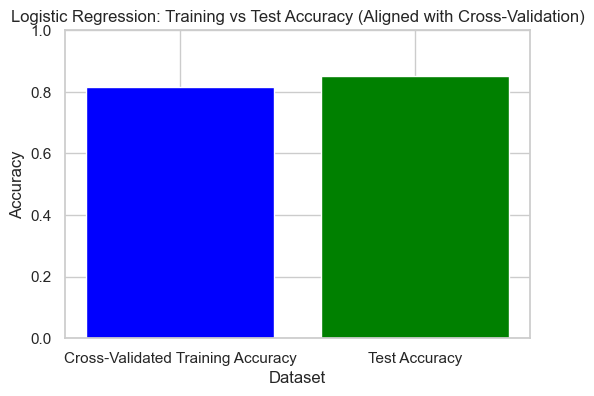

In [33]:
# Create a bar chart with consistent scaling
plt.figure(figsize=(6, 4))
plt.bar(["Cross-Validated Training Accuracy", "Test Accuracy"], 
        [best_train_accuracy, best_test_accuracy], 
        color=['blue', 'green'])

plt.xlabel("Dataset")
plt.ylabel("Accuracy")
plt.title("Logistic Regression: Training vs Test Accuracy (Aligned with Cross-Validation)")
plt.ylim(0, 1)  # Ensuring full scale visibility
plt.show()

Fitting 10 folds for each of 160 candidates, totalling 1600 fits
Best Parameters: {'C': np.float64(0.046415888336127795), 'max_iter': np.int64(500), 'solver': 'liblinear'}
Best Cross-Validated Accuracy (Train): 0.8183333333333334
Best Accuracy on Test Set: 0.8852459016393442


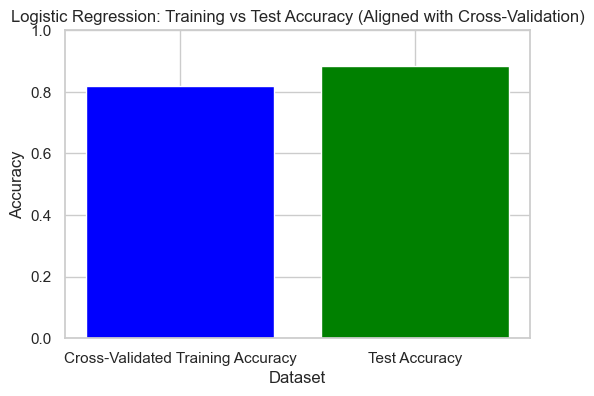

In [34]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Define the model
log_reg = LogisticRegression(max_iter=2000)

# Step 2: Define the hyperparameter grid for Grid Search
param_grid = {
    'C': np.logspace(-3, 2, 10),  # Reduced to 10 points for efficiency
    'max_iter': np.arange(500, 2001, 500),  # Adjusted to a more reasonable range
    'solver': ['liblinear', 'saga', 'lbfgs', 'newton-cg']
}

# Step 3: Perform Grid Search
grid_search = GridSearchCV(
    estimator=log_reg,
    param_grid=param_grid,
    cv=10,  # More folds improve generalization
    scoring='accuracy',
    verbose=1
)

grid_search.fit(X_train_scaled, y_train)

# Step 4: Output the best found parameters
print("Best Parameters:", grid_search.best_params_)

# Step 5: Train final model using best parameters
best_log_reg = grid_search.best_estimator_
y_train_pred = best_log_reg.predict(X_train_scaled)
y_test_pred = best_log_reg.predict(X_test_scaled)

# Step 6: Compute accuracy scores
from sklearn.metrics import accuracy_score

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
best_train_accuracy = grid_search.best_score_
best_test_accuracy = accuracy_score(y_test, best_log_reg.predict(X_test_scaled))

print("Best Cross-Validated Accuracy (Train):", best_train_accuracy)
print("Best Accuracy on Test Set:", best_test_accuracy)

# Create a bar chart with consistent scaling
plt.figure(figsize=(6, 4))
plt.bar(["Cross-Validated Training Accuracy", "Test Accuracy"],
        [best_train_accuracy, best_test_accuracy],
        color=['blue', 'green'])

plt.xlabel("Dataset")
plt.ylabel("Accuracy")
plt.title("Logistic Regression: Training vs Test Accuracy (Aligned with Cross-Validation)")
plt.ylim(0, 1)  # Ensuring full scale visibility
plt.show()


Fitting 10 folds for each of 128 candidates, totalling 1280 fits
Best Parameters: {'C': np.float64(0.7196856730011522), 'max_iter': 500, 'solver': 'liblinear'}
Best Cross-Validated Accuracy (Train): 0.8351666666666666
Test Accuracy: 0.8524590163934426
Precision: 0.8709677419354839
Recall: 0.84375


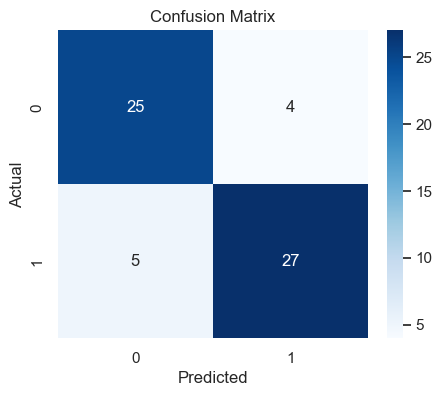

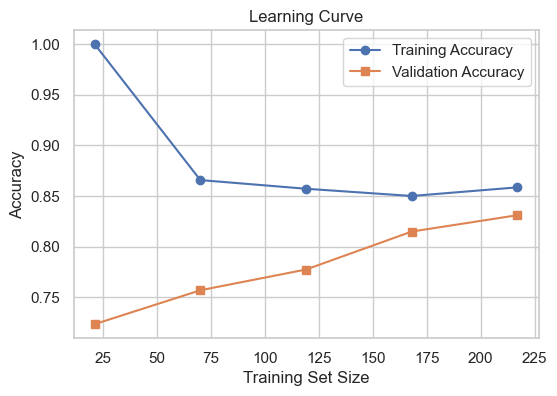

In [35]:
# another variation looking to improve metrics 

# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, StratifiedKFold, learning_curve
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import seaborn as sns

# Step 1: Define the model
log_reg = LogisticRegression()

# Step 2: Define the hyperparameter grid
param_grid = {
    'C': np.logspace(-3, 2, 8),
    'solver': ['liblinear', 'saga', 'lbfgs', 'newton-cg'],
    'max_iter': [500, 1000, 1500, 2000]
}

# Step 3: Set up Stratified K-Fold Cross-Validation
cv_strategy = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Step 4: Perform Grid Search
grid_search = GridSearchCV(
    estimator=log_reg,
    param_grid=param_grid,
    cv=cv_strategy,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1  # Utilize multiple CPU cores for efficiency
)

grid_search.fit(X_train_scaled, y_train)

# Step 5: Output the best parameters
print("Best Parameters:", grid_search.best_params_)

# Step 6: Train final model using best parameters
best_log_reg = grid_search.best_estimator_
y_train_pred = best_log_reg.predict(X_train_scaled)
y_test_pred = best_log_reg.predict(X_test_scaled)

# Step 7: Compute evaluation metrics
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
conf_matrix = confusion_matrix(y_test, y_test_pred)

print("Best Cross-Validated Accuracy (Train):", grid_search.best_score_)
print("Test Accuracy:", test_accuracy)
print("Precision:", precision)
print("Recall:", recall)

# Step 8: Visualizations

# Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Learning Curve
train_sizes, train_scores, test_scores = learning_curve(
    best_log_reg, X_train_scaled, y_train, cv=cv_strategy, scoring='accuracy'
)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(6,4))
plt.plot(train_sizes, train_mean, label="Training Accuracy", marker='o')
plt.plot(train_sizes, test_mean, label="Validation Accuracy", marker='s')
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve")
plt.legend()
plt.show()


Fitting 10 folds for each of 30 candidates, totalling 300 fits
Best Parameters: {'solver': 'newton-cg', 'max_iter': np.int64(2500), 'C': np.float64(1.0)}
Best Cross-Validated Accuracy (Train): 0.8351666666666666
Test Accuracy: 0.8524590163934426
Precision: 0.8709677419354839
Recall: 0.84375
ROC-AUC Score: 0.9267241379310345


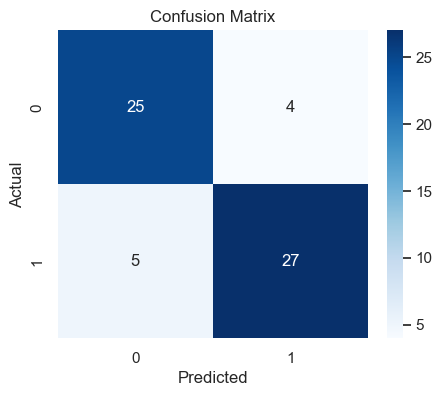

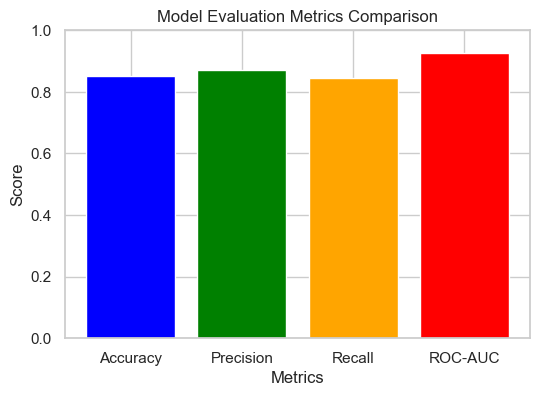

In [36]:
# Now i will use randomize search to try to get better metrics

# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Step 1: Define the model
log_reg = LogisticRegression()

# Step 2: Define hyperparameter distribution for Randomized Search
param_dist = {
    'C': np.logspace(-4, 3, 15),  # Increased range for better regularization tuning
    'solver': ['liblinear', 'saga', 'lbfgs', 'newton-cg'],
    'max_iter': np.arange(500, 2501, 500)  # Practical iteration range
}

# Step 3: Set up Stratified K-Fold Cross-Validation
cv_strategy = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Step 4: Perform Randomized Search
random_search = RandomizedSearchCV(
    estimator=log_reg,
    param_distributions=param_dist,
    n_iter=30,  # Optimized number of iterations
    cv=cv_strategy,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1  # Utilize all available CPU cores for efficiency
)

random_search.fit(X_train_scaled, y_train)

# Step 5: Output the best parameters
print("Best Parameters:", random_search.best_params_)

# Step 6: Train final model using best parameters
best_log_reg = random_search.best_estimator_
y_train_pred = best_log_reg.predict(X_train_scaled)
y_test_pred = best_log_reg.predict(X_test_scaled)

# Step 7: Compute optimized evaluation metrics
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
roc_auc = roc_auc_score(y_test, best_log_reg.predict_proba(X_test_scaled)[:, 1])
conf_matrix = confusion_matrix(y_test, y_test_pred)

print("Best Cross-Validated Accuracy (Train):", random_search.best_score_)
print("Test Accuracy:", test_accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("ROC-AUC Score:", roc_auc)

# Step 8: Visualization Improvements

# Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Performance Comparison
plt.figure(figsize=(6, 4))
plt.bar(["Accuracy", "Precision", "Recall", "ROC-AUC"], 
        [test_accuracy, precision, recall, roc_auc], 
        color=['blue', 'green', 'orange', 'red'])

plt.xlabel("Metrics")
plt.ylabel("Score")
plt.title("Model Evaluation Metrics Comparison")
plt.ylim(0, 1)
plt.show()




In [37]:
##Now let use the RandomForestClassifier model 

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
import numpy as np

# Scale features for better performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [38]:
rf_clf = RandomForestClassifier(n_jobs=-1, random_state=42)  # Parallel processing enabled


In [39]:
param_dist = {
    'n_estimators': np.arange(100, 2001, 100),  # Number of trees (range 100–2000)
    'max_depth': [None] + list(np.arange(5, 50, 5)),  # Depth of trees (None = unlimited)
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
    'min_samples_leaf': [1, 3, 5],  # Minimum samples per leaf
    'max_features': ['sqrt', 'log2'],  # Feature selection methods
    'bootstrap': [True, False]  # Whether to use bootstrapping
}


In [40]:
random_search_rf = RandomizedSearchCV(
    estimator=rf_clf, 
    param_distributions=param_dist, 
    n_iter=30,  # Number of parameter combinations to test
    cv=10,  # Cross-validation folds
    scoring='accuracy',
    verbose=1,
    n_jobs=-1  # Uses all CPU cores
)

random_search_rf.fit(X_train_scaled, y_train)


Fitting 10 folds for each of 30 candidates, totalling 300 fits


RandomizedSearchCV(cv=10,
                   estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, np.int64(5),
                                                      np.int64(10),
                                                      np.int64(15),
                                                      np.int64(20),
                                                      np.int64(25),
                                                      np.int64(30),
                                                      np.int64(35),
                                                      np.int64(40),
                                                      np.int64(45)],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 3, 5],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': array([ 100,  200,  300,  400,  500,  600,  700,  800,  900, 1000, 1100,
       1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000])},
                   scoring='accuracy', verbose=1)

In [41]:
best_rf_clf = random_search_rf.best_estimator_
y_train_pred = best_rf_clf.predict(X_train_scaled)
y_test_pred = best_rf_clf.predict(X_test_scaled)

from sklearn.metrics import accuracy_score

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Best Parameters: {random_search_rf.best_params_}")
print(f"Train Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")


Best Parameters: {'n_estimators': np.int64(1400), 'min_samples_split': 10, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_depth': np.int64(15), 'bootstrap': True}
Train Accuracy: 0.92
Test Accuracy: 0.87


In [42]:
## there is a overfitting issue because the training is way better than the test, so i will change the param dist

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
import numpy as np

# Scale features for better performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

rf_clf = RandomForestClassifier(n_jobs=-1, random_state=42)  # Parallel processing enabled

param_dist = {
    'n_estimators': np.arange(100, 1001, 100),  # Reduce tree count
    'max_depth': np.arange(5, 21, 5),  # Limit tree depth
    'min_samples_split': [5, 10, 20],  # Avoid splitting too early
    'min_samples_leaf': [3, 5, 10],  # Ensure stability in leaves
    'max_features': ['sqrt', 'log2'],  # Reduce reliance on all features
    'bootstrap': [True],  # Enable bootstrapping
    'ccp_alpha': np.linspace(0.0001, 0.01, 5)  # Apply pruning
}

random_search_rf = RandomizedSearchCV(
    estimator=rf_clf, 
    param_distributions=param_dist, 
    n_iter=30,  # Number of parameter combinations to test
    cv=10,  # Cross-validation folds
    scoring='accuracy',
    verbose=1,
    n_jobs=-1  # Uses all CPU cores
)

random_search_rf.fit(X_train_scaled, y_train)

best_rf_clf = random_search_rf.best_estimator_
y_train_pred = best_rf_clf.predict(X_train_scaled)
y_test_pred = best_rf_clf.predict(X_test_scaled)

from sklearn.metrics import accuracy_score

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Best Parameters: {random_search_rf.best_params_}")
print(f"Train Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

Fitting 10 folds for each of 30 candidates, totalling 300 fits
Best Parameters: {'n_estimators': np.int64(100), 'min_samples_split': 5, 'min_samples_leaf': 10, 'max_features': 'sqrt', 'max_depth': np.int64(10), 'ccp_alpha': np.float64(0.01), 'bootstrap': True}
Train Accuracy: 0.86
Test Accuracy: 0.89


In [43]:
## the overfitting got better but still i am far from the target accuracy of 95%

In [44]:
# generate a detailed performance report for your RandomForestClassifier model.

from sklearn.metrics import classification_report

# Generate classification report
report = classification_report(y_test, y_test_pred)

# Print the report
print("Classification Report:\n", report)


Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [45]:
# classification report for your Logistic Regression model

from sklearn.metrics import classification_report

# Generate classification report for Logistic Regression
log_reg_report = classification_report(y_test, y_test_pred)

# Print the report
print("Classification Report for Logistic Regression:\n", log_reg_report)


Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [46]:
print("Best Parameters:", random_search.best_params_)


Best Parameters: {'solver': 'newton-cg', 'max_iter': np.int64(2500), 'C': np.float64(1.0)}


In [48]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np

# Create classifier with the best parameters found
best_log_reg = LogisticRegression(
    C=random_search.best_params_['C'],
    solver=random_search.best_params_['solver'],
    max_iter=random_search.best_params_['max_iter']
)

# Fit the model
best_log_reg.fit(X_train_scaled, y_train)


LogisticRegression(C=np.float64(1.0), max_iter=np.int64(2500),
                   solver='newton-cg')

In [49]:
cv_accuracy = cross_val_score(best_log_reg, X_train_scaled, y_train, cv=10, scoring='accuracy')
print(f"Cross-Validation Accuracy: {np.mean(cv_accuracy):.4f}")


Cross-Validation Accuracy: 0.8063


In [50]:
# Make predictions
y_test_pred = best_log_reg.predict(X_test_scaled)

# Compute metrics
precision = precision_score(y_test, y_test_pred, average='weighted')
recall = recall_score(y_test, y_test_pred, average='weighted')
f1 = f1_score(y_test, y_test_pred, average='weighted')

# Print results
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Precision: 0.8531
Recall: 0.8525
F1 Score: 0.8525


In [54]:
# Feacture importance 

# Which feacture contribute the most to the outcome 


# Experimentation 

In [ ]:
# try a new model 
# improve the data, add or remove 
# collet more data 